In [135]:
import numpy as np
import numpy.linalg as npla

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Sets output floating point value to show only 4 places after dec.pt.
np.set_printoptions(precision = 4)

size of matrix img: (1512, 2016, 3)



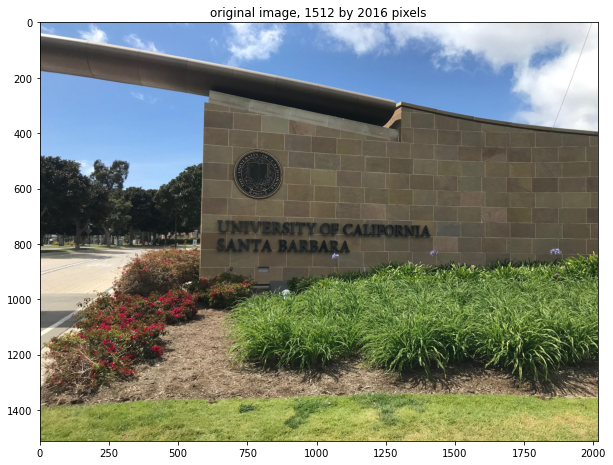

In [188]:
# Read the image from a .jpg file

# Working types
# img = plt.imread('palmtrees.jpeg')
img = plt.imread('henley.jpg')
# img = plt.imread('flowers.webp')
# img = plt.imread('stars.bmp')
# img = plt.imread('Campus_Point.jpeg')
# img = plt.imread('pool.jpeg')
# -------------------------------------
# img = plt.imread('pngattempt.png') # UNSUPPORTED? (Can't reconstruct)
# img = plt.imread('pdfattempt.pdf') # UNSUPPORTED?
# img = plt.imread('jpeg2000attempt.jp2') # UNSUPPORTED?


nrows, ncols, rgb = img.shape
print('size of matrix img:', img.shape)

# plot the original image (matrix)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('original image, %d by %d pixels' % (nrows, ncols))
print()

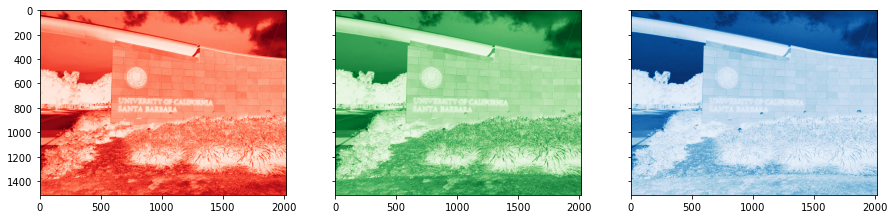

In [189]:
# Visualize splitting the image into R, G, and B
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
ax[0].imshow(img[:,:,0], cmap = 'Reds')
ax[1].imshow(img[:,:,1], cmap = 'Greens')
ax[2].imshow(img[:,:,2], cmap = 'Blues')

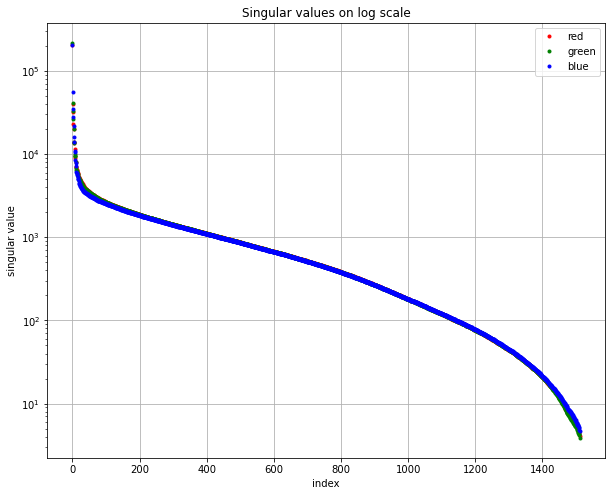

In [190]:
# Get SVD's for separate color matrices
U_red, sigma_red, Vt_red = npla.svd(img[:,:,0], full_matrices=False)
U_green, sigma_green, Vt_green = npla.svd(img[:,:,1], full_matrices=False)
U_blue, sigma_blue, Vt_blue = npla.svd(img[:,:,2], full_matrices=False)

%matplotlib inline
fig0 = plt.figure(figsize=(10,8))
plt.plot(sigma_red,'.', color='r')
plt.plot(sigma_green,'.', color='g')
plt.plot(sigma_blue,'.', color='b')
plt.yscale('log')
plt.title('Singular values on log scale')
plt.ylabel('singular value')
plt.xlabel('index')
plt.legend(('red', 'green', 'blue'))
plt.grid()
print()

In [197]:
# Change k here
k = 50

nrows, ncols = img[:,:,0].shape
red = np.zeros(img[:,:,0].shape)
green = np.zeros(img[:,:,0].shape)
blue = np.zeros(img[:,:,0].shape)

# Recostruct color matrices from singular values
for i in range(k):
    red += sigma_red[i] * np.outer(U_red[:,i], Vt_red[i,:])
    green += sigma_green[i] * np.outer(U_green[:,i], Vt_green[i,:])
    blue += sigma_blue[i] * np.outer(U_blue[:,i], Vt_blue[i,:])

# Assemble the RGB matrix of floats
shrunk = np.zeros(img.shape)
shrunk[:,:, 0] = red
shrunk[:,:, 1] = green
shrunk[:,:, 2] = blue

# Take care of overflows before converting to integers
for i in range(nrows):
    for j in range(ncols):
        for color in range(3):
            if shrunk[i, j, color] > 255:
                shrunk[i, j, color] = 255
            if shrunk[i, j, color] < 0:
                shrunk[i, j, color] = 0
                
# Colors are int encoded, convert to int matrix
shrunk = shrunk.astype(np.uint8)

orig_size = nrows*ncols*3
compressed = k * (nrows+ncols)*3

print('Assuming pixel-for-pixel storage:')
print('Storage needed for original M:', orig_size)
print('Storage needed for M%d:' % k, compressed)
print()
print('Compression factor:', orig_size/compressed)

Assuming pixel-for-pixel storage:
Storage needed for original M: 9144576
Storage needed for M50: 529200

Compression factor: 17.28


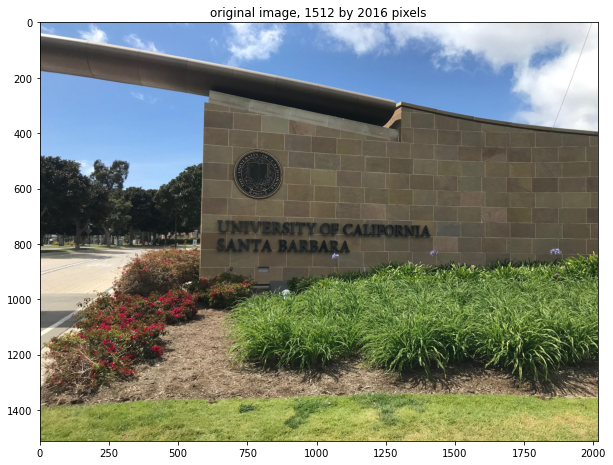

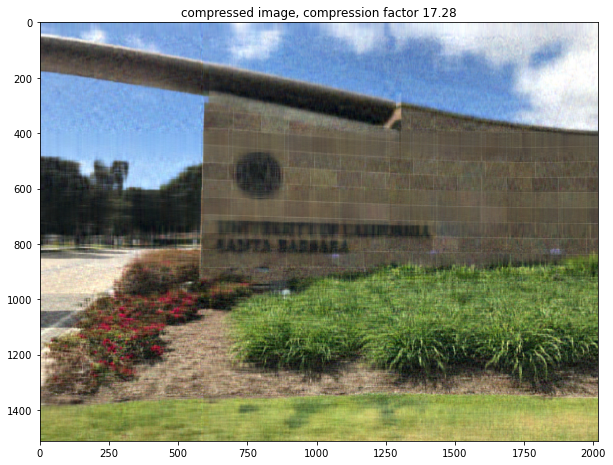

In [198]:
# plot the original image (matrix)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('original image, %d by %d pixels' % (nrows, ncols))
print()

# plot the compressed image
plt.figure(figsize=(10,10))
plt.imshow(shrunk)
plt.title('compressed image, compression factor {:.2f}'.format(orig_size/compressed))
print()